In [1]:
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point
from shapely import wkt
import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline


In [10]:
title = pd.read_table('title.akas.tsv')

/home/abhiram/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
basics = pd.read_table('title.basics.tsv')

/home/abhiram/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
ratings = pd.read_table('title.ratings.tsv')

In [10]:
basics.rename(columns = {'tconst': 'titleId'}, inplace=True)

NameError: name 'basics' is not defined

In [11]:
ratings.rename(columns = {'tconst': 'titleId'}, inplace=True)

NameError: name 'ratings' is not defined

In [2]:
crew = pd.read_table('title.crew.tsv')

In [3]:
crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [10]:
title.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Καρμενσίτα,GR,\N,\N,\N,0
2,tt0000001,3,Карменсита,RU,\N,\N,\N,0
3,tt0000001,4,Carmencita,US,\N,\N,\N,0
4,tt0000001,5,Carmencita,\N,\N,original,\N,1


In [22]:
basics.head()

,titleId,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [7]:
ratings.head()

,titleId,averageRating,numVotes
0,tt0000001,5.6,1538
1,tt0000002,6.1,186
2,tt0000003,6.5,1198
3,tt0000004,6.2,114
4,tt0000005,6.1,1909


In [2]:
names = pd.read_table('name.basics.tsv')

In [3]:
principals = pd.read_table('title.principals.tsv')

In [12]:
names.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0050419,tt0043044,tt0053137"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0117057,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0054452,tt0059956,tt0057345,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,writer,soundtrack","tt0080455,tt0078723,tt0077975,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050986,tt0069467,tt0050976"


In [8]:
principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Herself""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [ ]:
title_principal = pd.merge(names, principals[['tconst', 'category', 'job', 'characters']], on='nconst')

In [15]:
imdb_df = pd.merge(basics, ratings, on='titleId')

In [9]:
imdb_df.head()

,titleId,titleType,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,0,1894,\N,1,"Documentary,Short",5.6,1538
1,tt0000002,short,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.1,186
2,tt0000003,short,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1198
3,tt0000004,short,Un bon bock,0,1892,\N,\N,"Animation,Short",6.2,114
4,tt0000005,short,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.1,1909


In [9]:
imdb_df.columns

NameError: name 'imdb_df' is not defined

In [ ]:
imdb_df.drop(['primaryTitle'], inplace=True, axis=1)

In [17]:
df = title[['region', 'language']]
df['titleId'] = title['titleId']
df.head()

/home/abhiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,region,language,titleId
0,HU,\N,tt0000001
1,GR,\N,tt0000001
2,RU,\N,tt0000001
3,US,\N,tt0000001
4,\N,\N,tt0000001


In [18]:
dataframe = pd.merge(imdb_df,df, on='titleId')

In [13]:
dataframe.head()

,titleId,titleType,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,region,language
0,tt0000001,short,Carmencita,0,1894,\N,1,"Documentary,Short",5.6,1538,HU,\N
1,tt0000001,short,Carmencita,0,1894,\N,1,"Documentary,Short",5.6,1538,GR,\N
2,tt0000001,short,Carmencita,0,1894,\N,1,"Documentary,Short",5.6,1538,RU,\N
3,tt0000001,short,Carmencita,0,1894,\N,1,"Documentary,Short",5.6,1538,US,\N
4,tt0000001,short,Carmencita,0,1894,\N,1,"Documentary,Short",5.6,1538,\N,\N


In [19]:
dataframe.to_csv('prep_dataset.csv', index=False)

In [13]:
dataset = pd.read_csv('prep_dataset.csv', skiprows=[i for i in range(1,2106121)])

In [9]:
dataset.shape

(200001, 13)

In [15]:
dataset.head()

,titleId,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,region,language
0,tt5614720,movie,NG83 When We Were B Boys,NG83 When We Were B Boys,0,2016,\N,74,Documentary,8.5,11,GB,\N
1,tt5614748,short,Like a Butterfly,Like a Butterfly,0,2016,\N,28,"Drama,Family,Mystery",7.2,78,US,\N
2,tt5614750,tvEpisode,Duch z wyspy,Duch z wyspy,0,1980,\N,8,"Adventure,Animation,Drama",2.8,10,AT,\N
3,tt5614796,tvMovie,Le Sacre du printemps,Le Sacre du printemps,0,1978,\N,37,\N,8.0,5,XWG,\N
4,tt5614844,tvSeries,Cloak & Dagger,Cloak & Dagger,0,2018,\N,44,"Action,Adventure,Drama",6.8,14304,ES,\N


In [ ]:
names_professions = pd.merge(names, principals[['tcon']])

In [16]:
names.head(2)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0050419,tt0043044,tt0053137"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0117057,tt0071877"


In [21]:
principals.head(15)

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Herself""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N
5,tt0000003,1,nm0721526,director,\N,\N
6,tt0000003,2,nm5442194,producer,producer,\N
7,tt0000003,3,nm1335271,composer,\N,\N
8,tt0000003,4,nm5442200,editor,\N,\N
9,tt0000004,1,nm0721526,director,\N,\N


In [21]:
dataset = dataset.sort_index()

In [29]:
dataset.loc[dataset.startYear == '2005']

,titleId,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,region,language
553,tt5619208,tvSeries,Thief of Baghdad,Thief of Baghdad,0,2005,2006,\N,Fantasy,6.3,32,IN,\N
614,tt5619808,tvSpecial,Erik van Muiswinkel & Diederik van Vleuten: An...,Erik van Muiswinkel & Diederik van Vleuten: An...,0,2005,\N,95,"Comedy,Documentary",7.5,8,NL,\N
719,tt5621458,short,I Love You Honey Bunny,I Love You Honey Bunny,0,2005,\N,13,"Comedy,Horror,Short",8.5,6,ES,\N
1059,tt5626398,short,Gritando amor,Gritando amor,0,2005,\N,5,"Horror,Short",8.7,7,ES,\N
1289,tt5630272,video,Lindsay Lohan: First,Lindsay Lohan: First,0,2005,\N,3,"Music,Short",5.8,31,US,\N
1290,tt5630286,video,Lindsay Lohan: Confessions of a Broken Heart (...,Lindsay Lohan: Confessions of a Broken Heart (...,0,2005,\N,4,"Drama,Music,Short",7.1,56,US,\N
1525,tt5635114,short,Disney Channel Stars: A Dream Is a Wish Your H...,Disney Channel Stars: A Dream Is a Wish Your H...,0,2005,\N,4,"Music,Short",7.7,39,\N,\N
1526,tt5635114,short,Disney Channel Stars: A Dream Is a Wish Your H...,Disney Channel Stars: A Dream Is a Wish Your H...,0,2005,\N,4,"Music,Short",7.7,39,US,\N
1544,tt5635296,short,Emma Roberts: Dummy,Emma Roberts: Dummy,0,2005,\N,3,"Music,Short",6.4,14,US,\N
1545,tt5635306,short,Emma Roberts: I Wanna Be,Emma Roberts: I Wanna Be,0,2005,\N,3,"Music,Short",6.3,11,US,\N


In [24]:
dataset = dataset_new[200000:]

In [30]:
a = dataset.loc[(dataset.startYear == '1980') | (dataset.startYear == '2018')]
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56146 entries, 2 to 199946
Data columns (total 13 columns):
titleId           56146 non-null object
titleType         56146 non-null object
primaryTitle      56146 non-null object
originalTitle     56146 non-null object
isAdult           56146 non-null int64
startYear         56146 non-null object
endYear           56146 non-null object
runtimeMinutes    56146 non-null object
genres            56146 non-null object
averageRating     56146 non-null float64
numVotes          56146 non-null int64
region            56146 non-null object
language          56146 non-null object
dtypes: float64(1), int64(2), object(10)
memory usage: 6.0+ MB


In [31]:
%%time
genres = dataset['genres'].str.split(',').apply(pd.Series).stack()

CPU times: user 51.1 s, sys: 796 ms, total: 51.9 s
Wall time: 51.7 s


In [32]:
genres.index = genres.index.droplevel(-1)
genres.name = 'genres'
del dataset['genres']
df = dataset.join(genres)

,titleId,titleType,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,region,language,genres
0,tt0000001,short,Carmencita,0,1894,\N,1,5.6,1538,HU,\N,Documentary
0,tt0000001,short,Carmencita,0,1894,\N,1,5.6,1538,HU,\N,Short
1,tt0000001,short,Carmencita,0,1894,\N,1,5.6,1538,GR,\N,Documentary
1,tt0000001,short,Carmencita,0,1894,\N,1,5.6,1538,GR,\N,Short
2,tt0000001,short,Carmencita,0,1894,\N,1,5.6,1538,RU,\N,Documentary


In [33]:
df.to_csv('imdb_df.csv', index=False)

## Actual project --- imdb_df.csv

In [2]:
imdb_df = pd.read_csv('imdb_df.csv')

In [148]:
imdb_df = imdb_df.sort_values(by='startYear', ascending=False)
imdb_df.tail()

,titleId,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,region,language,genres
298440,tt8061198,videoGame,Total War: Three Kingdoms,Total War: Three Kingdoms,0,0,\N,0,8.3,26,GB,\N,Action
298439,tt8061198,videoGame,Total War: Three Kingdoms,Total War: Three Kingdoms,0,0,\N,0,8.3,26,US,\N,Action
270205,tt7699414,tvMiniSeries,The Dictator's Playbook,The Dictator's Playbook,0,0,\N,54,7.6,117,\N,\N,History
380311,tt9574312,tvEpisode,Episode #3.8,Episode #3.8,0,0,\N,0,6.5,6,PT,pt,Sport
380314,tt9574314,tvEpisode,Episode #3.9,Episode #3.9,0,0,\N,0,6.8,6,IN,hi,Sport


In [147]:
imdb_df.startYear.count()

390653

In [28]:
def convert_to_int(data):
    return imdb_df[data].replace('\\N','0').astype('int')

In [29]:
imdb_df['runtimeMinutes'] = convert_to_int('runtimeMinutes')

In [30]:
imdb_df['startYear'] = convert_to_int('startYear')

In [31]:
test = imdb_df.loc[(imdb_df.startYear == 2005) | (imdb_df.startYear == 2018)]
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112167 entries, 77857 to 164599
Data columns (total 13 columns):
titleId           112167 non-null object
titleType         112167 non-null object
primaryTitle      112167 non-null object
originalTitle     112167 non-null object
isAdult           112167 non-null int64
startYear         112167 non-null int64
endYear           112167 non-null object
runtimeMinutes    112167 non-null int64
averageRating     112167 non-null float64
numVotes          112167 non-null int64
region            112167 non-null object
language          112167 non-null object
genres            112167 non-null object
dtypes: float64(1), int64(4), object(8)
memory usage: 12.0+ MB


In [4]:
imdb_df.columns

Index(['titleId', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'averageRating', 'numVotes',
       'region', 'language', 'genres'],
      dtype='object')

## working with genres

In [8]:
genres = imdb_df.groupby('genres')['numVotes'].count().sort_values(ascending=False).to_frame()
genres.head()

,numVotes
genres,
Drama,84144
Comedy,51159
Short,24978
Romance,24461
Crime,23820


In [ ]:
#Most of the films directed between 1976 and 2018 were 'Drama'.

In [32]:
def get_data(col, condition):
    return imdb_df.loc[imdb_df[col]==condition]

In [51]:

drama = get_data('genres', 'Drama')
drama = drama.reset_index()
drama.head()

,index,titleId,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,region,language,genres
0,297273,tt8041276,movie,Paddleton,Paddleton,0,2019,\N,89,7.2,7181,\N,\N,Drama
1,153382,tt6612946,movie,Changeland,Changeland,0,2019,\N,86,5.5,647,\N,\N,Drama
2,158080,tt6662812,short,Never Land,Never Land,0,2019,\N,16,9.7,10,US,\N,Drama
3,158082,tt6662812,short,Never Land,Never Land,0,2019,\N,16,9.7,10,\N,\N,Drama
4,297374,tt8043312,movie,Natpuna Ennanu Theriyuma,Natpuna Ennanu Theriyuma,0,2019,\N,123,5.8,53,IN,\N,Drama


In [56]:
drama_year = drama.groupby('startYear')['genres'].count().to_frame()
drama_year = drama_year.sort_index(ascending=False).head(20)
drama_year

,genres
startYear,
2019,11336
2018,27692
2017,26770
2016,13069
2015,1319
2014,637
2013,231
2012,384
2011,109


In [60]:
imdb_df.loc[(imdb_df['startYear']==2015) | (imdb_df.titleType=='movie')]

,titleId,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,region,language,genres
297273,tt8041276,movie,Paddleton,Paddleton,0,2019,\N,89,7.2,7181,\N,\N,Drama
148365,tt6565702,movie,Dark Phoenix,Dark Phoenix,0,2019,\N,113,5.8,95514,AR,\N,Sci-Fi
148364,tt6565702,movie,Dark Phoenix,Dark Phoenix,0,2019,\N,113,5.8,95514,AR,\N,Adventure
297322,tt8042248,movie,Kanchana 3,Kanchana 3,0,2019,\N,164,4.3,850,\N,\N,Horror
153382,tt6612946,movie,Changeland,Changeland,0,2019,\N,86,5.5,647,\N,\N,Drama
153383,tt6612946,movie,Changeland,Changeland,0,2019,\N,86,5.5,647,GB,\N,Comedy
148403,tt6565702,movie,Dark Phoenix,Dark Phoenix,0,2019,\N,113,5.8,95514,US,\N,Adventure
297320,tt8042248,movie,Kanchana 3,Kanchana 3,0,2019,\N,164,4.3,850,\N,\N,Action
297374,tt8043312,movie,Natpuna Ennanu Theriyuma,Natpuna Ennanu Theriyuma,0,2019,\N,123,5.8,53,IN,\N,Drama
297373,tt8043312,movie,Natpuna Ennanu Theriyuma,Natpuna Ennanu Theriyuma,0,2019,\N,123,5.8,53,IN,\N,Comedy


In [52]:
test = drama.loc[drama.titleType == 'movie']

In [64]:
len(test)

26415

In [69]:
test.sort_index(ascending=True).head(20)

,index,titleId,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,region,language,genres
0,297273,tt8041276,movie,Paddleton,Paddleton,0,2019,\N,89,7.2,7181,\N,\N,Drama
1,153382,tt6612946,movie,Changeland,Changeland,0,2019,\N,86,5.5,647,\N,\N,Drama
4,297374,tt8043312,movie,Natpuna Ennanu Theriyuma,Natpuna Ennanu Theriyuma,0,2019,\N,123,5.8,53,IN,\N,Drama
5,297319,tt8042116,movie,House Owner,House Owner,0,2019,\N,0,6.9,70,\N,\N,Drama
6,297269,tt8041276,movie,Paddleton,Paddleton,0,2019,\N,89,7.2,7181,FR,\N,Drama
8,297267,tt8041276,movie,Paddleton,Paddleton,0,2019,\N,89,7.2,7181,US,\N,Drama
14,159023,tt6668974,movie,Burning Men,Burning Men,0,2019,\N,95,8.2,38,GB,\N,Drama
17,161056,tt6682820,movie,Resistance,Legalidade,0,2019,\N,122,7.3,25,US,\N,Drama
18,297143,tt8038726,movie,Dulla Vaily,Dulla Vaily,0,2019,\N,133,4.2,17,IN,en,Drama
26,296522,tt8027868,movie,Symphony No. 9,Symphony No. 9,0,2019,\N,0,5.7,14,IR,fa,Drama


In [85]:
test_year = test.groupby('region')['genres'].count().to_frame()
test_year = test_year.sort_values(by='genres', ascending=False).head(20)
test_year.head(7).index.values

array(['\\N', 'XWW', 'US', 'RU', 'IN', 'PL', 'FR'], dtype=object)

In [82]:
test.region.unique()

array(['\\N', 'IN', 'FR', 'US', 'GB', 'IR', 'ES', 'PL', 'XWW', 'RU', 'DE',
       'BD', 'HU', 'TR', 'CH', 'AR', 'LT', 'PT', 'BR', 'CA', 'SI', 'AT',
       'RS', 'HR', 'BJ', 'CM', 'LB', 'SE', 'JP', 'MA', 'BE', 'NO', 'NZ',
       'IL', 'CG', 'LU', 'TN', 'DZ', 'DK', 'MC', 'SN', 'IT', 'MK', 'NL',
       'SK', 'MX', 'LA', 'GR', 'EE', 'BG', 'AU', 'PE', 'UA', 'CL', 'UY',
       'RO', 'CZ', 'FI', 'IS', 'HK', 'VN', 'CN', 'TH', 'DO', 'LV', 'XKV',
       'AL', 'ID', 'CR', 'MY', 'KZ', 'SG', 'TW', 'KR', 'VE', 'SV', 'XEU',
       'XAS', 'PH', 'SA', 'IE', 'KW', 'NP', 'EG', 'CO', 'GT', 'BA', 'ZA',
       'PR', 'MN', 'MD', 'EC', 'MZ', 'BO', 'MT', 'BT', 'CSXX', 'GE', 'UZ',
       'LK', 'SM', 'PY', 'CY', 'PS', 'AE', 'YE', 'TZ', 'PK', 'AM', 'AF',
       'SY', 'ME', 'KE', 'CU', 'PA', 'MM', 'BY', 'KG', 'NG', 'GH', 'AD',
       'BF', 'NI', 'FO', 'MW', 'HN', 'AZ', 'XKO', 'TT', 'XSA', 'RW', 'JM',
       'IQ', 'KH', 'MO', 'BH', 'PG', 'UG', 'HT', 'SUHH', 'CSHH', 'XWG'],
      dtype=object)

In [93]:
test_region = test_year.head(7).index.values
test_region = np.delete(test_region, 0)

In [94]:
test_region

array(['XWW', 'US', 'RU', 'IN', 'PL', 'FR'], dtype=object)

In [144]:
test_df = pd.DataFrame()
for i in test_region:
    test_df = test_df.append(test.loc[test.region==i])

In [119]:
test_df.startYear.max()

2019

In [145]:
test_df = test_df.loc[test_df['startYear'] > 2010]
test_df.sort_index(inplace=True)

In [134]:
test_df.tail()

,index,titleId,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,region,language,genres
81919,228470,tt7251610,movie,Revenge,Revenge,0,2008,\N,120,7.0,14,FR,\N,Drama
81995,335955,tt8653638,movie,A Curtain Raiser & Other Shorts,Un lever de rideau et autres histoires,0,2007,\N,132,6.8,23,FR,\N,Drama
82158,228499,tt7251810,movie,Blackmail,Il Ricatto,1,2005,\N,98,7.0,9,FR,\N,Drama
82159,228497,tt7251810,movie,Blackmail,Il Ricatto,1,2005,\N,98,7.0,9,FR,\N,Drama
82162,8163,tt5664668,movie,Courts mais GAY: Tome 9,Courts mais GAY: Tome 9,0,2005,\N,95,5.8,5,FR,\N,Drama


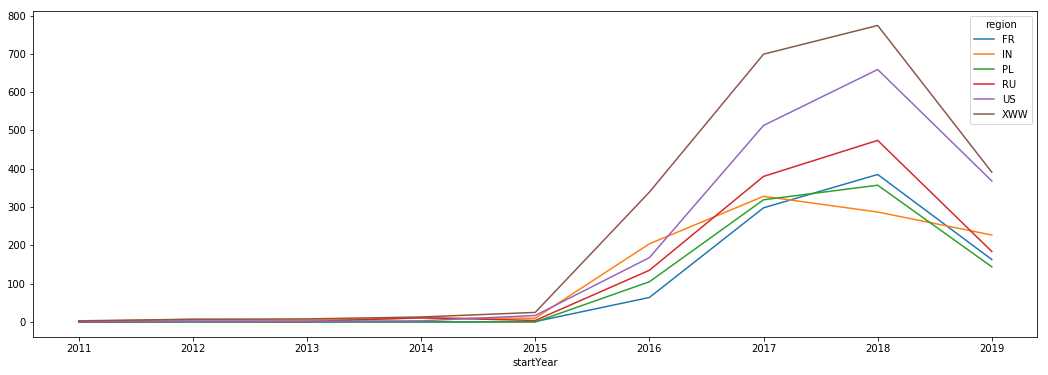

In [146]:
drama_vs_region = pd.crosstab(test_df.startYear, test_df.region)
drama_vs_region.plot()
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [45]:
comedy = get_data('genres', 'Comedy')
horror = get_data('genres', 'Horror')


In [36]:
comedy_year = comedy.groupby('startYear')['genres'].count().to_frame()
comedy_year = comedy_year.sort_index(ascending=False).head(20)


horror_year = horror.groupby('startYear')['genres'].count().to_frame()
horror_year = horror_year.sort_index(ascending=False).head(20)
horror_year

,genres
startYear,
2019,1389
2018,2835
2017,3173
2016,1774
2015,224
2014,88
2013,49
2012,60
2011,29


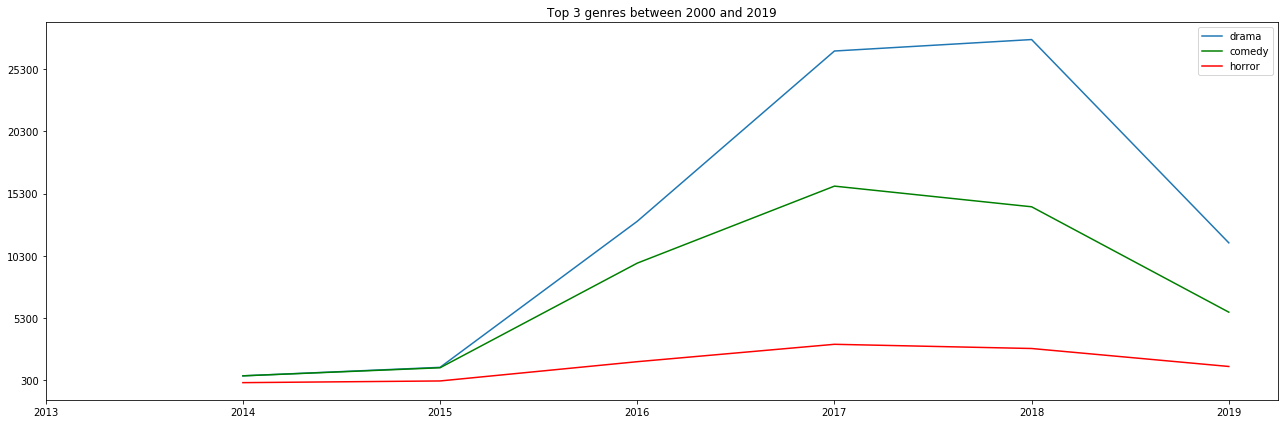

In [43]:
fig, ax = plt.subplots(1, figsize=(18,6))
plt.plot(drama_year.head(6).index, drama_year.head(6).values ,label='drama')
plt.plot(comedy_year.head(6).index, comedy_year.head(6).values, color='green', label='comedy')
plt.plot(horror_year.head(6).index, horror_year.head(6).values, color='red', label='horror')
plt.yticks(np.arange(300, 30000,5000)) 
plt.xticks(np.arange(2013, 2020, 1)) 
plt.title('Top 3 genres between 2000 and 2019')
plt.legend(loc='upper right')
plt.tight_layout()

In [17]:
test = imdb_df[imdb_df.startYear==0]
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 380314 to 76124
Data columns (total 13 columns):
titleId           75 non-null object
titleType         75 non-null object
primaryTitle      75 non-null object
originalTitle     75 non-null object
isAdult           75 non-null int64
startYear         75 non-null int64
endYear           75 non-null object
runtimeMinutes    75 non-null int64
averageRating     75 non-null float64
numVotes          75 non-null int64
region            75 non-null object
language          75 non-null object
genres            75 non-null object
dtypes: float64(1), int64(4), object(8)
memory usage: 8.2+ KB


In [20]:
test[test.titleType == 'movie'].count()

titleId           11
titleType         11
primaryTitle      11
originalTitle     11
isAdult           11
startYear         11
endYear           11
runtimeMinutes    11
averageRating     11
numVotes          11
region            11
language          11
genres            11
dtype: int64

In [67]:
en_lang = imdb_df.loc[imdb_df['language'] == 'en']

In [7]:
en_lang.tail()

,titleId,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,region,language,genres
1036055,tt0088527,tvSeries,Growing Pains,Growing Pains,0,1985,1992,30,6.6,12433,CA,en,Family
1036095,tt0088528,tvSeries,Adventures of the Gummi Bears,Adventures of the Gummi Bears,0,1985,1991,30,7.5,8518,XWW,en,Animation
1036096,tt0088528,tvSeries,Adventures of the Gummi Bears,Adventures of the Gummi Bears,0,1985,1991,30,7.5,8518,XWW,en,Family
1036097,tt0088528,tvSeries,Adventures of the Gummi Bears,Adventures of the Gummi Bears,0,1985,1991,30,7.5,8518,XWW,en,Fantasy
1036233,tt0088545,tvMiniSeries,The Secret of the Black Dragon,Jenseits der Morgenröte,0,1985,1985,100,8.6,46,XWW,en,Adventure


In [12]:
en_lang.titleType.unique()

array(['short', 'movie', 'tvSeries', 'tvMovie', 'tvEpisode', 'tvShort',
       'tvMiniSeries', 'video'], dtype=object)

In [13]:
en_movies = en_lang.loc[en_lang['titleType'] == 'movie']

In [16]:
en_movies.head()

,titleId,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,region,language,genres
4261,tt0000941,movie,Locura de amor,Locura de amor,0,1909,\N,\N,4.2,10,XWW,en,Drama
4791,tt0001122,movie,The Red Inn,L'auberge rouge,0,1910,\N,\N,5.2,8,XWW,en,\N
4831,tt0001175,movie,Camille,La dame aux camélias,0,1912,\N,\N,5.5,22,XWW,en,Drama
4832,tt0001175,movie,Camille,La dame aux camélias,0,1912,\N,\N,5.5,22,XWW,en,Romance
4983,tt0001258,movie,The White Slave Trade,Den hvide slavehandel,0,1910,\N,45,5.8,72,XWW,en,Drama


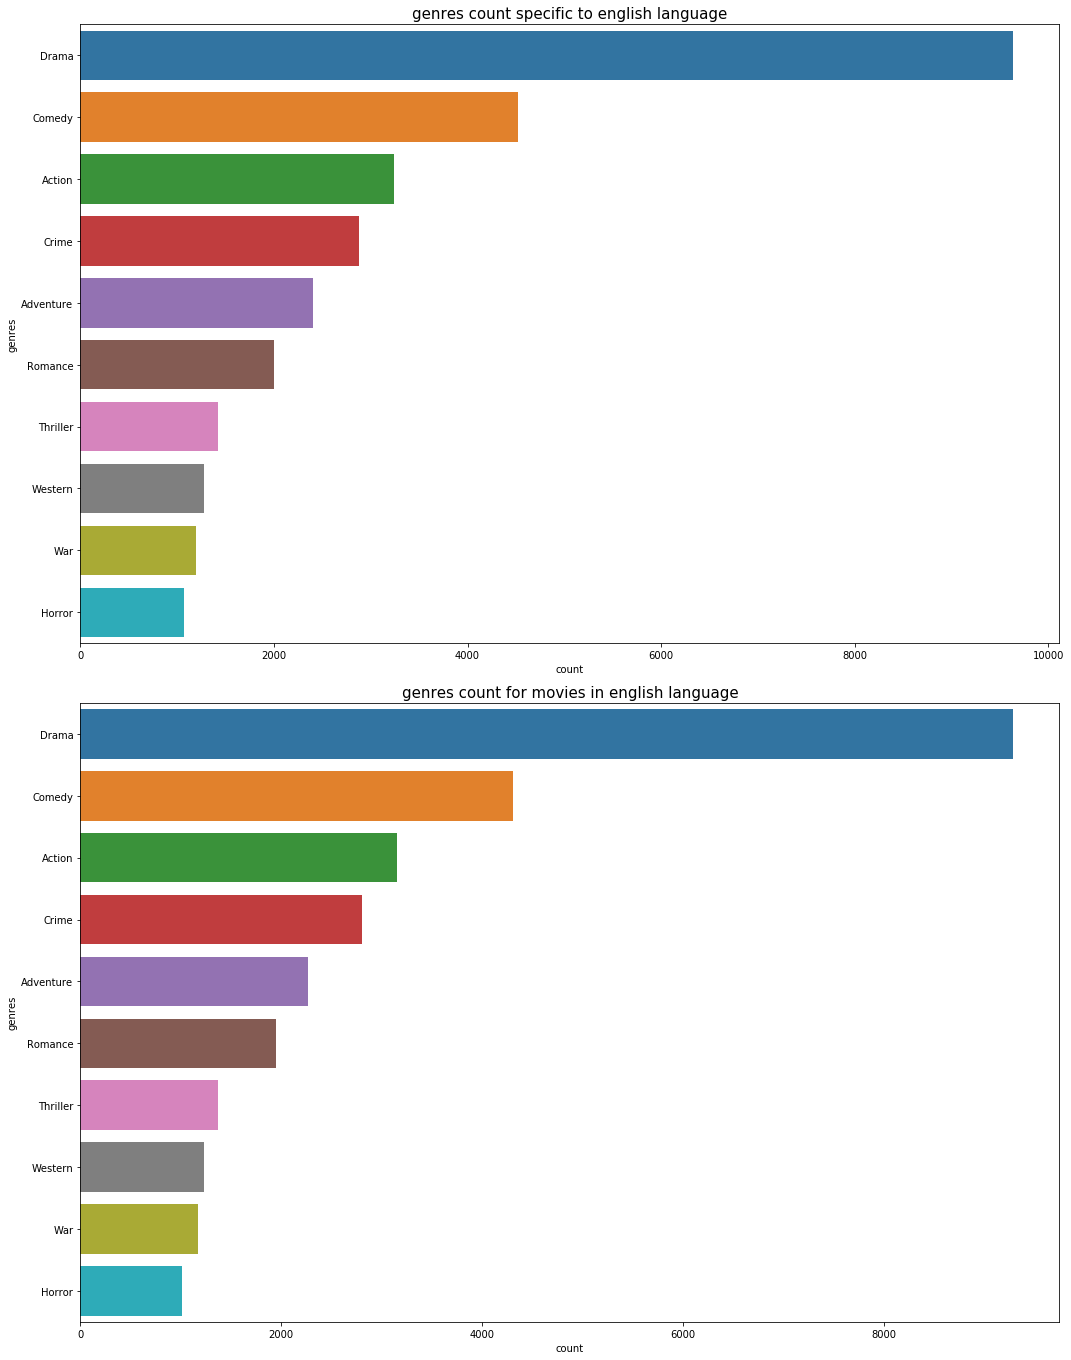

In [49]:
fig, ax = plt.subplots(2, figsize=(15,19))
eng = sns.countplot(y = 'genres', data=en_lang, 
                    order = en_lang['genres'].value_counts().head(10).index,
                    ax=ax[0])
eng.set_title("genres count specific to english language", fontsize=15)

en_mov = sns.countplot(y = 'genres', data=en_movies, ax=ax[1],
                      order = en_lang['genres'].value_counts().head(10).index)
                      
en_mov.set_title("genres count for movies in english language", fontsize=15)

plt.tight_layout()

In [51]:
en_lang.head(3)

,titleId,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,region,language,genres
149,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0,1896,\N,1,7.4,9322,XWW,en,Action
150,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0,1896,\N,1,7.4,9322,XWW,en,Documentary
151,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0,1896,\N,1,7.4,9322,XWW,en,Short


In [108]:
ratings = imdb_df.drop_duplicates(subset='primaryTitle')

In [109]:
en_ratings.reset_index(inplace=True)
en_ratings.drop('index', axis=1, inplace=True)

/home/abhiram/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [110]:
en_ratings.head()

,titleId,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,region,language,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,5.6,1538,HU,\N,Documentary
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,6.1,186,\N,\N,Animation
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,6.5,1198,RO,\N,Animation
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,6.2,114,\N,\N,Animation
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,6.1,1909,US,\N,Comedy


In [111]:
en_ratings.groupby('startYear')['averageRating'].median()

startYear
1892    6.20
1893    6.10
1894    5.40
1895    5.45
1896    4.70
1897    5.10
1898    4.85
1899    5.65
1900    5.60
1901    6.10
1902    5.40
1903    5.65
1904    5.30
1905    5.70
1906    6.10
1907    5.70
1908    5.60
1909    5.10
1910    5.40
1911    5.35
1912    5.60
1913    5.65
1914    5.80
1915    5.95
1916    6.10
1917    6.00
1918    6.10
1919    6.20
1920    6.30
1921    6.30
        ... 
1970    6.30
1971    6.40
1972    6.30
1973    6.30
1974    6.40
1975    6.40
1976    6.40
1977    6.40
1978    6.40
1979    6.40
1980    6.30
1981    6.40
1982    6.40
1983    6.40
1984    6.40
1985    6.50
1986    6.60
1987    6.85
1988    6.90
1989    6.90
1990    6.70
1991    7.25
1992    7.50
1993    5.90
1995    6.50
1999    7.40
2001    6.40
2009    6.50
2010    5.10
2018    6.50
Name: averageRating, Length: 108, dtype: float64

Text(0,0.5,'Ratings')

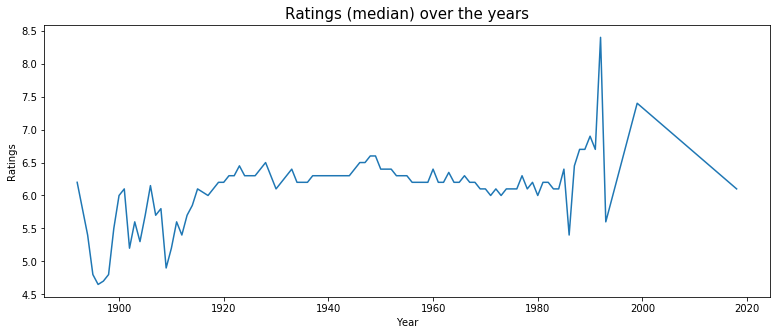

In [117]:
plt.figure(figsize=(13,5))
en_ratings.loc[en_ratings.runtimeMinutes > '30'].groupby('startYear')['averageRating'].median().plot()
plt.title("Ratings (median) over the years", fontsize=15)
plt.xlabel('Year')
plt.ylabel('Ratings')

In [118]:
en_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57227 entries, 0 to 57226
Data columns (total 13 columns):
titleId           57227 non-null object
titleType         57227 non-null object
primaryTitle      57227 non-null object
originalTitle     57227 non-null object
isAdult           57227 non-null int64
startYear         57227 non-null int64
endYear           57227 non-null object
runtimeMinutes    57227 non-null object
averageRating     57227 non-null float64
numVotes          57227 non-null int64
region            57227 non-null object
language          57227 non-null object
genres            57227 non-null object
dtypes: float64(1), int64(3), object(9)
memory usage: 5.7+ MB


In [115]:
en_ratings.loc[(en_ratings.startYear >= 1892) & (en_ratings.startYear <= 1990)]

,titleId,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,region,language,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,5.6,1538,HU,\N,Documentary
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,6.1,186,\N,\N,Animation
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,6.5,1198,RO,\N,Animation
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,6.2,114,\N,\N,Animation
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,6.1,1909,US,\N,Comedy
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,5.2,102,RU,\N,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,5.4,612,US,\N,Short
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,5.4,1645,HU,\N,Documentary
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,5.4,80,\N,\N,Romance
9,tt0000010,short,Exiting the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,6.9,5488,\N,\N,Documentary


### We can see that 

In [106]:
ratings_1990_2019 = en_ratings.loc[(en_ratings.startYear >= 1980) & (en_ratings.startYear <= 1999)][['startYear','averageRating']]

In [107]:
ratings_1990_2019.groupby('startYear')['averageRating'].median()

startYear
1980    6.40
1981    6.40
1982    6.30
1983    6.40
1984    6.40
1985    6.35
1986    5.40
1987    7.75
1988    6.20
1989    7.25
1990    7.50
1991    6.15
1993    6.45
1995    7.00
Name: averageRating, dtype: float64

In [53]:
imdb_us = imdb_df[imdb_df['region'] == 'US']

In [51]:
imdb_us.head()

,index,titleId,titleType,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,genres,region
0,3,tt0000001,short,Carmencita,0,1894,\N,1,5.6,1538,NaN,US
1,10,tt0000002,short,Le clown et ses chiens,0,1892,\N,5,6.1,186,NaN,US
2,23,tt0000005,short,Blacksmith Scene,0,1893,\N,1,6.1,1909,NaN,US
3,26,tt0000005,short,Blacksmith Scene,0,1893,\N,1,6.1,1909,NaN,US
4,27,tt0000005,short,Blacksmith Scene,0,1893,\N,1,6.1,1909,NaN,US


In [52]:
def reset_index_col(data):
    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)

In [54]:
reset_index_col(imdb_us)

/home/abhiram/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


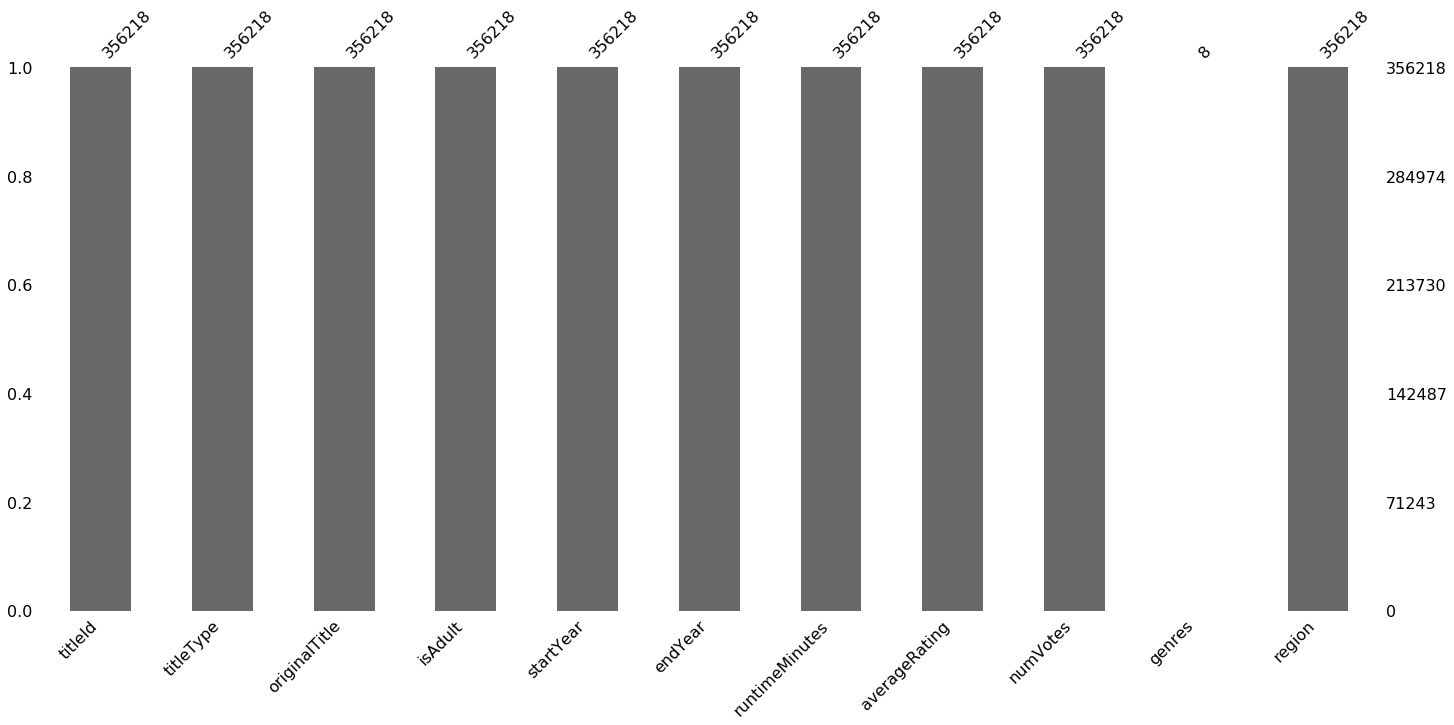

In [58]:
msn.bar(imdb_us)